In [17]:
import numpy as np
import cv2
import OpCV_Utils
import random
import matplotlib.pyplot as plt

In [30]:
def img_homography(img, points1, points2, pad=0):
    # Points must have to be defined in the same resolution for the source and destination images.
    # points format = np.array([[[p1x, p1y]], [[p2x, p2y]], [[p3x, p3y]], [[p4x, p4y]]])
    
    ###################################################
    reordered_points1 = np.zeros_like(points1)
    points1 = points1.reshape((4,2))
    
    add = points1.sum(1)
    reordered_points1[0] = points1[np.argmin(add)]
    reordered_points1[3] = points1[np.argmax(add)]
    
    diff = np.diff(points1, axis = 1)
    reordered_points1[1] = points1[np.argmin(diff)]
    reordered_points1[2] = points1[np.argmax(diff)]
    
    points1 = reordered_points1
    ###################################################
    reordered_points2 = np.zeros_like(points2)
    points2 = points2.reshape((4,2))
    
    add = points2.sum(1)
    reordered_points2[0] = points2[np.argmin(add)]
    reordered_points2[3] = points2[np.argmax(add)]
    
    diff = np.diff(points2, axis = 1)
    reordered_points2[1] = points2[np.argmin(diff)]
    reordered_points2[2] = points2[np.argmax(diff)]
    
    points2 = reordered_points2
    ###################################################
    
    pts1 = np.float32(points1)
    pts2 = np.float32(points2)
    matrix = cv2.getPerspectiveTransform(pts1,pts2)
 
    W = img.shape[1]
    H = img.shape[0]
    img_warp = cv2.warpPerspective(img, matrix, (W,H))
    img_warp = img_warp[pad:img_warp.shape[0]-pad, pad:img_warp.shape[1]-pad]
    
    return img_warp

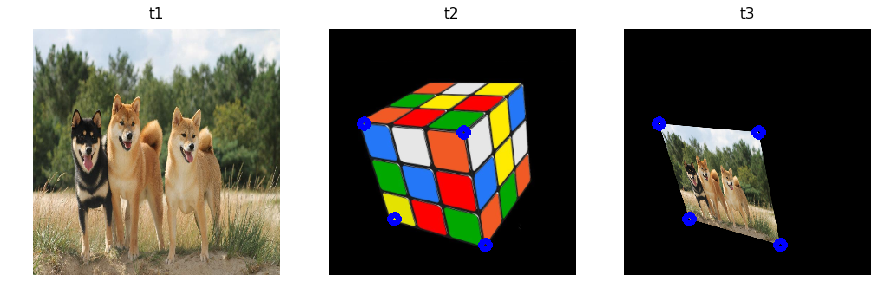

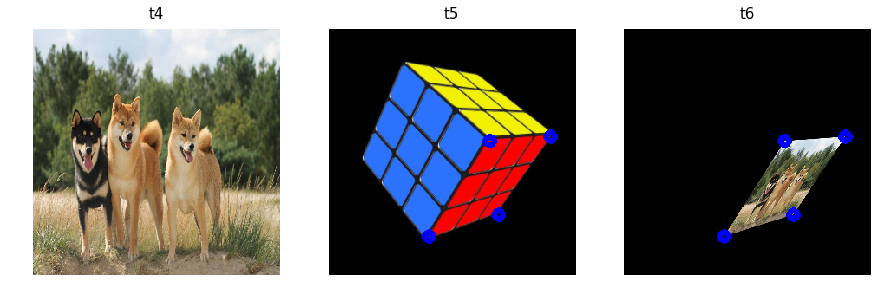

In [31]:
image1 = cv2.imread('ztest_media/cachorros.jpg')
image1 = cv2.resize(image1, (285,285))

points1 = np.array([[[0, 0]],[[0, image1.shape[1]]],[[image1.shape[0], 0]],[[image1.shape[0], image1.shape[1]]]])

p1x = 40;  p1y = 110
p2x = 155; p2y = 120
p3x = 75;  p3y = 220
p4x = 180; p4y = 250
points2 = np.array([[[p1x, p1y]],[[p2x, p2y]],[[p3x, p3y]],[[p4x, p4y]]])

img_hgraphy = img_homography(image1, points1, points2, pad=0)
cv2.circle(img_hgraphy, (p1x,p1y), 5, (255, 0, 0), 5)
cv2.circle(img_hgraphy, (p2x,p2y), 5, (255, 0, 0), 5)
cv2.circle(img_hgraphy, (p3x,p3y), 5, (255, 0, 0), 5)
cv2.circle(img_hgraphy, (p4x,p4y), 5, (255, 0, 0), 5)

image2 = cv2.imread('cube1.png')
cv2.circle(image2, (p1x,p1y), 5, (255, 0, 0), 5)
cv2.circle(image2, (p2x,p2y), 5, (255, 0, 0), 5)
cv2.circle(image2, (p3x,p3y), 5, (255, 0, 0), 5)
cv2.circle(image2, (p4x,p4y), 5, (255, 0, 0), 5)

img1_RGB = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
img2_RGB = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
img_hgraphy_RGB = cv2.cvtColor(img_hgraphy, cv2.COLOR_BGR2RGB)
OpCV_Utils.show_multiple_images_plt([[img1_RGB, img2_RGB, img_hgraphy_RGB]],[['t1','t2','t3']])

p1x = 185; p1y = 130
p2x = 255; p2y = 125
p3x = 115; p3y = 240
p4x = 195; p4y = 215
points2 = np.array([[[p1x, p1y]],[[p2x, p2y]],[[p3x, p3y]],[[p4x, p4y]]])

img_hgraphy = img_homography(image1, points1, points2, pad=0)
cv2.circle(img_hgraphy, (p1x,p1y), 5, (255, 0, 0), 5)
cv2.circle(img_hgraphy, (p2x,p2y), 5, (255, 0, 0), 5)
cv2.circle(img_hgraphy, (p3x,p3y), 5, (255, 0, 0), 5)
cv2.circle(img_hgraphy, (p4x,p4y), 5, (255, 0, 0), 5)

image2 = cv2.imread('cube2.png')
cv2.circle(image2, (p1x,p1y), 5, (255, 0, 0), 5)
cv2.circle(image2, (p2x,p2y), 5, (255, 0, 0), 5)
cv2.circle(image2, (p3x,p3y), 5, (255, 0, 0), 5)
cv2.circle(image2, (p4x,p4y), 5, (255, 0, 0), 5)

img2_RGB = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
img_hgraphy_RGB = cv2.cvtColor(img_hgraphy, cv2.COLOR_BGR2RGB)
OpCV_Utils.show_multiple_images_plt([[img1_RGB, img2_RGB, img_hgraphy_RGB]],[['t4','t5','t6']])